# SI 618 - Homework #6: Machine Learning 1

Version 2023.11.01.1.CT


In this homework exercise you will apply the machine learning techniques we've covered so far:
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we _strongly_ urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):

> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate that you did so in the work that you submit. **If you fail to
> disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:

- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions.


In [46]:
MY_UNIQNAME = "yanlunar"  # fill this in with your uniqname

Some ot the code are completed by generative AI


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('pastel')

## Task 1 (10 points):

Perform exploratory data analyses on the variables in this dataset. Your work should include both
numerical **and** graphical overviews of the data. Explain your findings.


In [48]:
customer = pd.read_csv("./marketing_campaign.csv", sep="\t")

In [49]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [50]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [51]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [52]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Categorical Values in the Dataset

Text(0, 0.5, 'Marital Status')

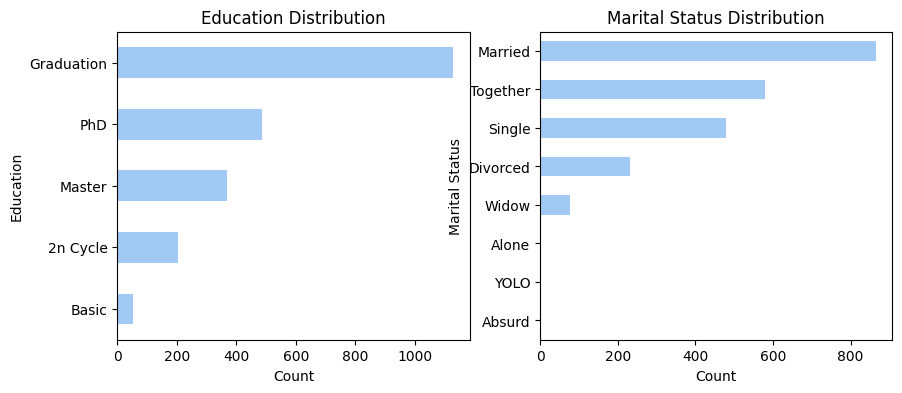

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
customer['Education'].value_counts().sort_values(ascending=True).\
    plot(kind='barh', ax=ax[0])
customer['Marital_Status'].value_counts().sort_values(ascending=True).\
    plot(kind='barh', ax=ax[1])

ax[0].set_title('Education Distribution')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Education')
ax[1].set_title('Marital Status Distribution')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Marital Status')

### Numeric Values in the Dataset

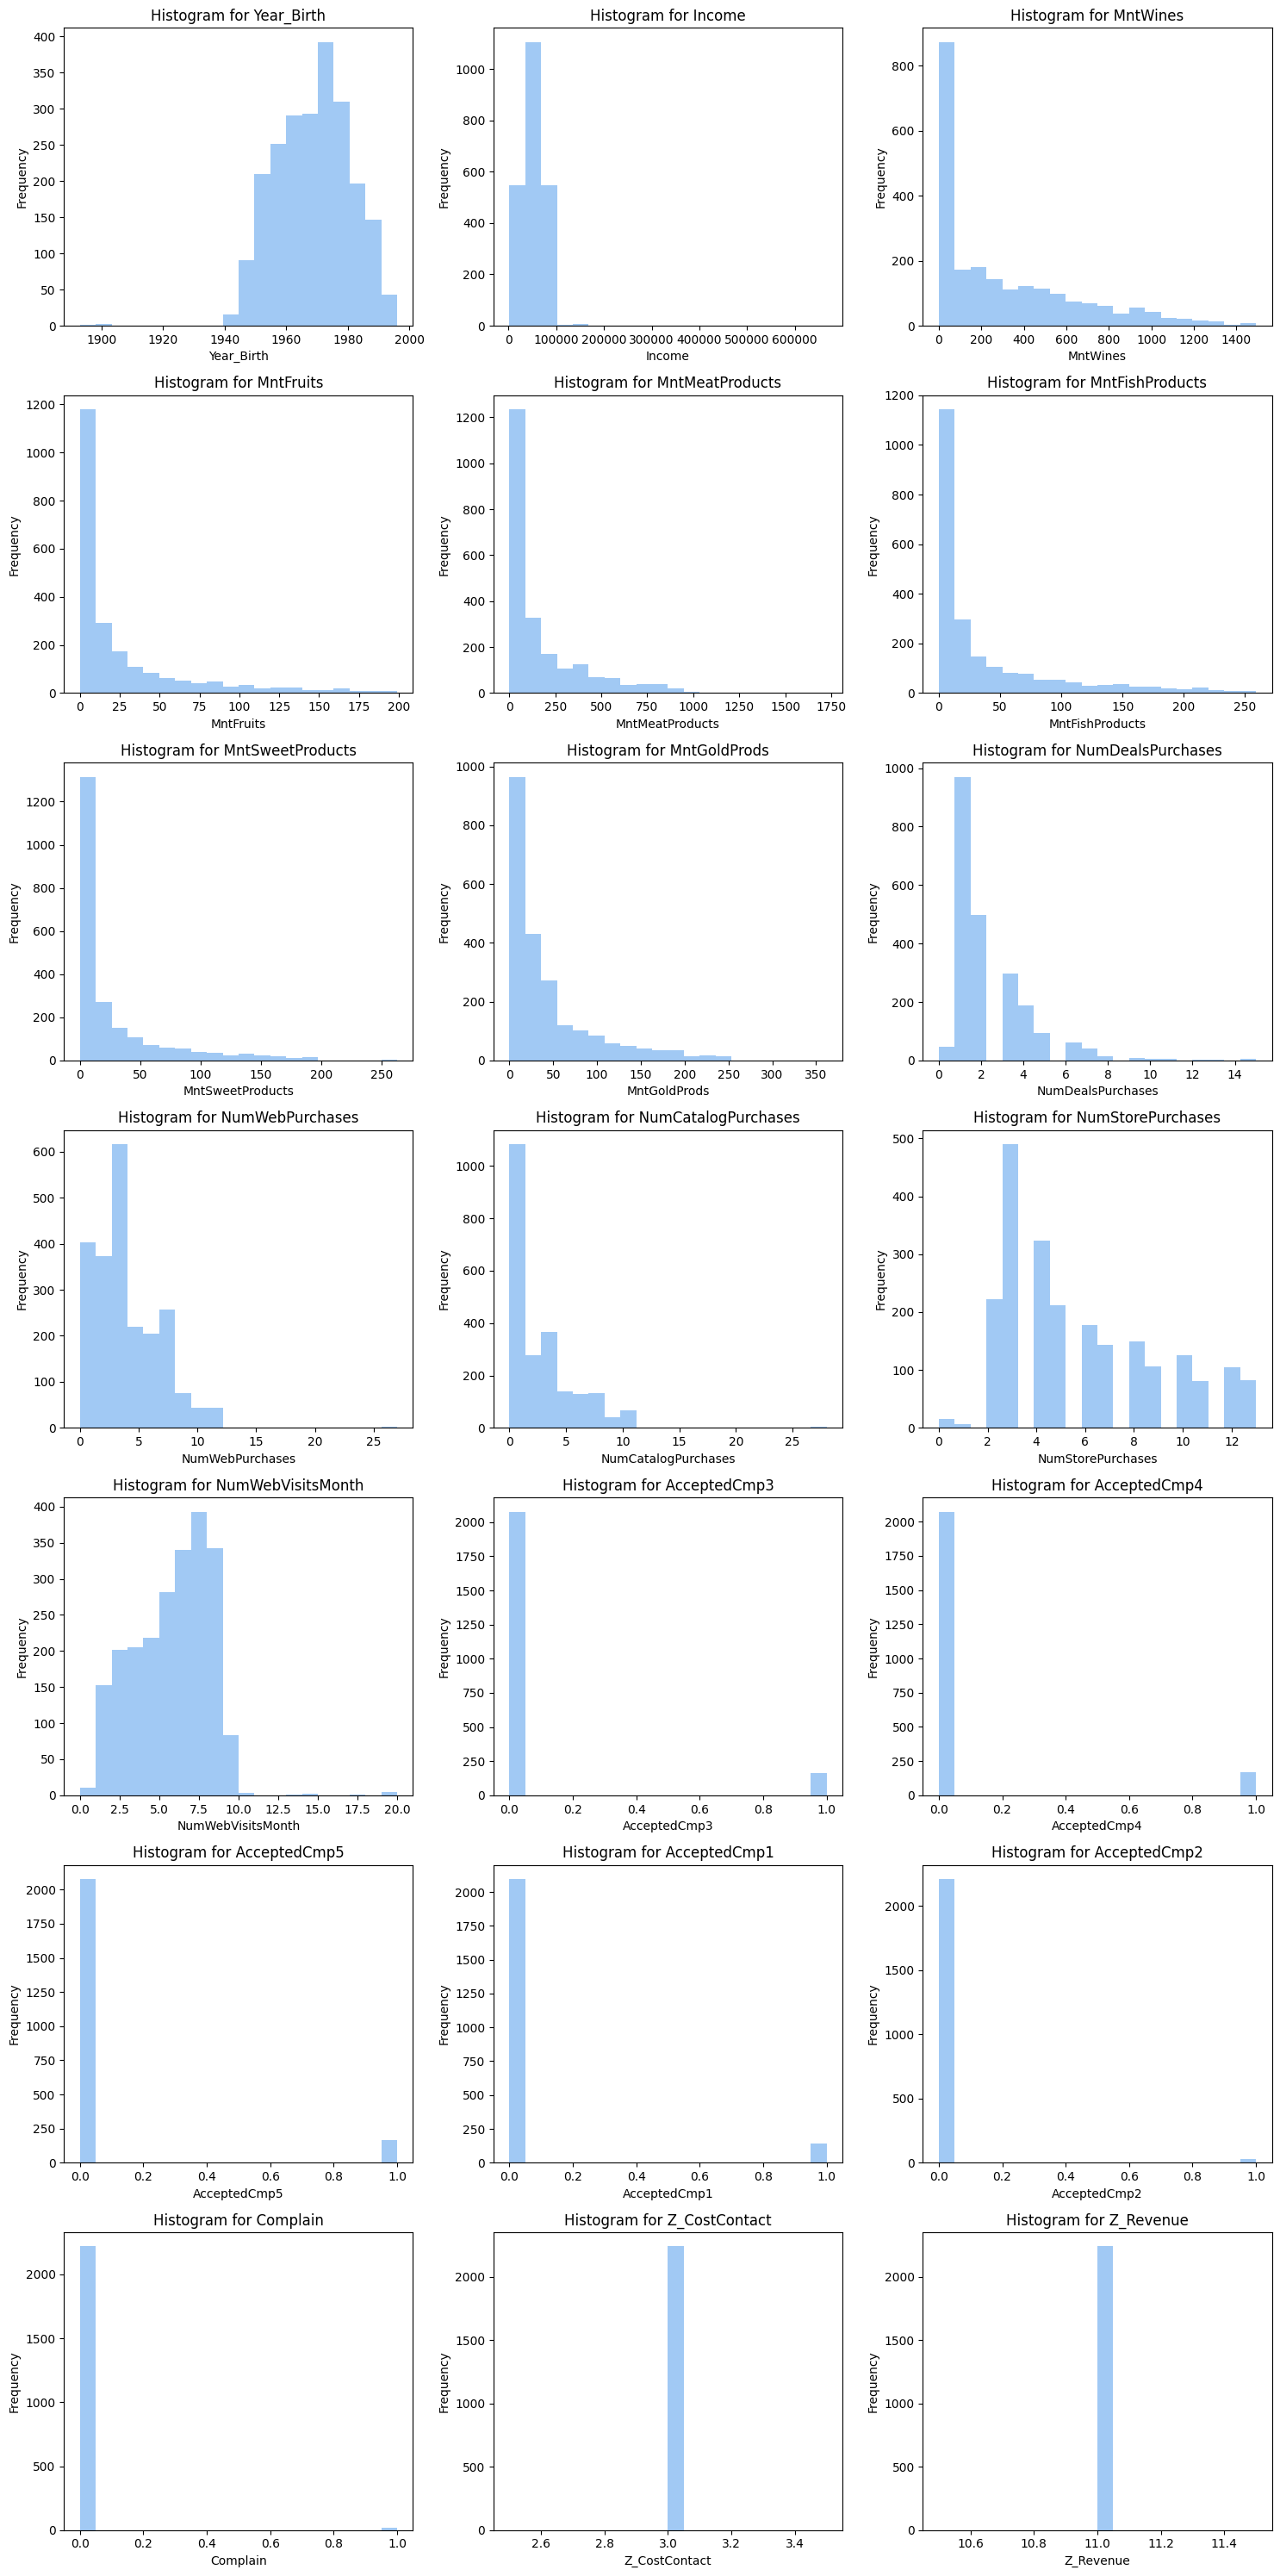

In [54]:
columns_to_plot = customer.columns.drop(['ID', 'Education', 'Marital_Status', \
    'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Response'])

num_plots = len(columns_to_plot)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    customer[column].plot(kind='hist', ax=ax, bins=20)
    ax.set_title(f'Histogram for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: >

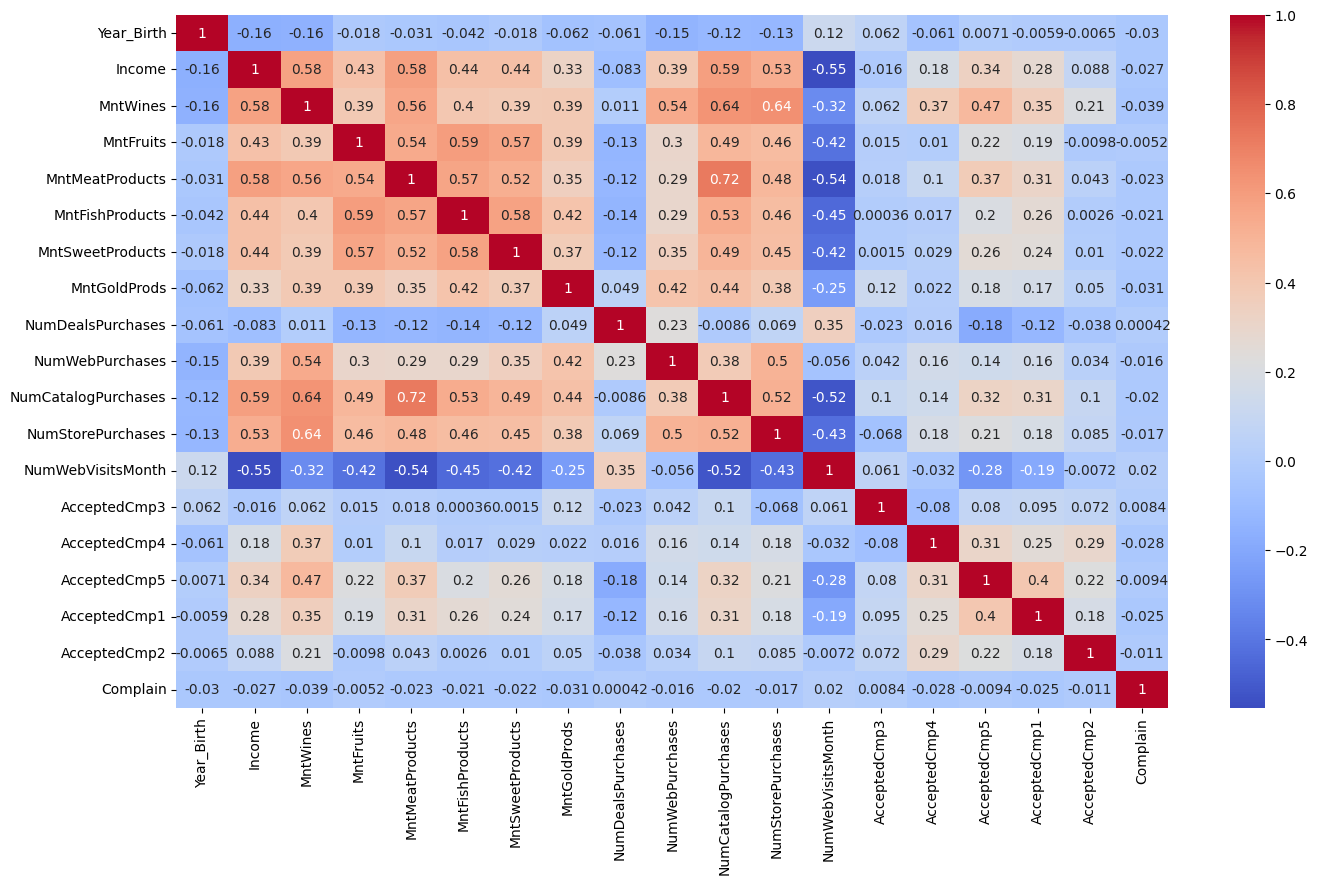

In [55]:
plt.figure(figsize=(16, 9))
sns.heatmap(customer.drop\
    (['ID', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', \
        'Dt_Customer', 'Recency', 'Response', 'Z_CostContact', 'Z_Revenue'], \
            axis=1).corr(), annot=True, cmap='coolwarm')

### My Explanation
- The dataset contains 29 fields, and 2 of them are categorical
- For categorical values, 
    - Education: Graduation are the most, then PhD, Master, 2n Cycle and Basic
    - Marital Status: Married are the most, followed by together, single... 
- For numeric values, 
    - For most of the purchase value, the frequency decreases as the consumption level goes higher
    - The age (year of birth) & income conforming to normal distribution 
    - From the heatmap, there is a strong positive relationship between NumCatalogPurchases and MntMeatProducts
    - From the heatmap, there is a strong negative relationship between NumWebVisitsMonth and Income

## Task 2 (1 point): Drop all columns that have constant values.


In [56]:
customer.loc[:, customer.nunique() == 1].columns

Index(['Z_CostContact', 'Z_Revenue'], dtype='object')

In [57]:
# insert your code here
customer = customer.loc[:, customer.nunique() != 1]
customer.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [58]:
customer.shape

(2240, 27)

### My Explanation
Two columns are dropped: Z_CostContact and Z_Revenue

## Task 3 (1 point):

Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise. Drop the `Marital_Status` column.


In [59]:
# insert your code here
customer['In_Relationship'] = customer['Marital_Status']\
    .apply(lambda x: 1 if x in ['Married', 'Together'] else 0)
customer_drop_marital = customer.drop('Marital_Status', axis=1)
customer_drop_marital['In_Relationship'].head()

0    0
1    0
2    1
3    1
4    1
Name: In_Relationship, dtype: int64

In [60]:
customer_drop_marital['In_Relationship'].unique()

array([0, 1])

### My Explanation
Now the "In_Relationship" only has two unique values, 0 and 1.

## Task 4 (3 points):

Impute missing income values with the median income. Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).


In [61]:
print("The median value was", customer['Income'].median())
print(customer['Income'].isnull().sum(), "values missing")

The median value was 51381.5
24 values missing


Text(0.5, 1.0, 'Income Distribution')

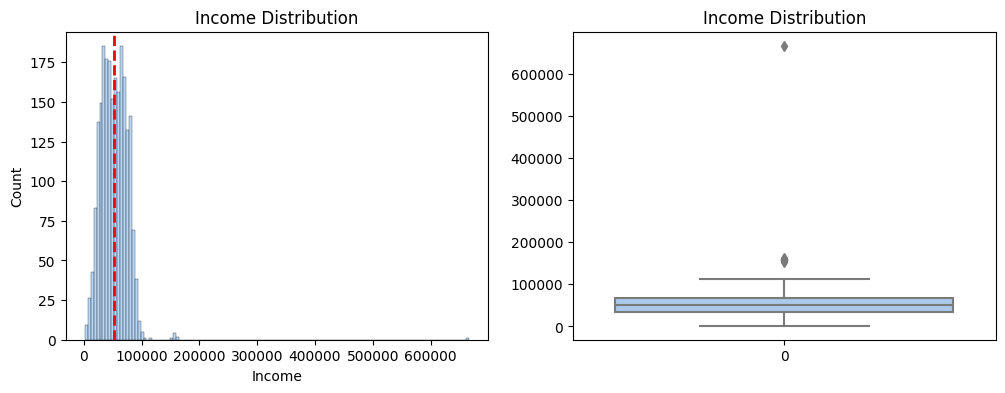

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(customer['Income'], ax=ax[0])
ax[0].axvline(customer['Income'].median(), color='red', \
    linestyle='dashed', linewidth=2)
ax[0].set_title('Income Distribution')

sns.boxplot(customer['Income'], ax=ax[1])
ax[1].set_title('Income Distribution')

In [63]:
# # Insert your code here
# median_income = customer['Income'].median()
# customer['Income'] = customer['Income'].fillna(median_income)

In [64]:
from sklearn.impute import SimpleImputer

In [65]:
imputer = SimpleImputer(strategy="median")
imputer.fit(customer[['Income']])

SimpleImputer(strategy='median')

In [66]:
customer['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [67]:
customer['Income'] = imputer.transform(customer[['Income']])

In [68]:
print(customer['Income'].isnull().sum())

0


### My Explanation
The median value was 51381.5, and 24 missing values are filled with this value. The median value is reliable because the distribution is normal and the data are not skewed, except for several outliers 

## Task 5 (15 points):

Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`). Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset. Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.


In [69]:
# insert your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
customer_train_set, customer_test_set = \
    train_test_split(customer, test_size=0.2, random_state=42)

In [71]:
customer_train_set.shape, customer_test_set.shape

((1792, 28), (448, 28))

In [72]:
lin_reg = LinearRegression()
X_train = customer_train_set[['Income','In_Relationship']]
y_train = customer_train_set['MntWines']
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
X_test = customer_test_set[['Income', 'In_Relationship']]
mnt_wines_predict = lin_reg.predict(X_test)

In [74]:
mnt_wines_labels = customer_test_set['MntWines']

In [75]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(mnt_wines_labels, mnt_wines_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

263.61704688252837

### My Explanation
We seperate our test dataset as an 80-20 train-test-split of the original dataset. The RMSE value is around 263.6, which is small. The model performs quite well.

## Task 6 (20 points):

Conduct an agglomerative clustering analysis to find 4 clusters using average linkage based on PCA projections of the original data onto 5 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA). Report the percentage of variance retained in the first 5 principal components.

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership. Comment on the results of your clustering analysis.

Repeat the above steps using 7 clusters. Compare the results to the 4 cluster solution. Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments. Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)


In [76]:
# insert your code here
from sklearn.preprocessing import OneHotEncoder

In [77]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'In_Relationship'],
      dtype='object')

In [78]:
customer_cat = customer[['Education', 'Marital_Status']]
customer_num = customer.drop(['Education', 'Marital_Status', 'ID'], axis=1)

In [79]:
cat_encoder = OneHotEncoder(sparse=False)
customer_cat_1hot = cat_encoder.fit_transform(customer_cat)
customer_cat_1hot

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
customer_num['dt_customer_timestamp'] = pd.to_datetime(customer_num['Dt_Customer'], format='mixed').astype(int) / 10**9
customer_num = customer_num.drop(['Dt_Customer'], axis=1)

In [81]:
customer_num.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'In_Relationship',
       'dt_customer_timestamp'],
      dtype='object')

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_num_scaled = scaler.fit_transform(customer_num)
customer_num_scaled

array([[-0.98534473,  0.23569584, -0.82521765, ...,  2.38884634,
        -1.34687429, -1.97674456],
       [-1.23573295, -0.23545419,  1.03255877, ..., -0.41861211,
        -1.34687429,  1.66701074],
       [-0.3176428 ,  0.77399892, -0.82521765, ..., -0.41861211,
         0.74245979,  0.17246808],
       ...,
       [ 1.01776106,  0.18947568, -0.82521765, ..., -0.41861211,
        -1.34687429,  0.84867327],
       [-1.06880747,  0.67940139, -0.82521765, ..., -0.41861211,
         0.74245979,  0.84436623],
       [-1.23573295,  0.02520835,  1.03255877, ...,  2.38884634,
         0.74245979, -1.16271412]])

In [83]:
customer_prepared = np.concatenate((customer_num_scaled, customer_cat_1hot), axis=1)
customer_prepared

array([[-0.98534473,  0.23569584, -0.82521765, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23573295, -0.23545419,  1.03255877, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3176428 ,  0.77399892, -0.82521765, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01776106,  0.18947568, -0.82521765, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06880747,  0.67940139, -0.82521765, ...,  1.        ,
         0.        ,  0.        ],
       [-1.23573295,  0.02520835,  1.03255877, ...,  0.        ,
         0.        ,  0.        ]])

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=5, random_state=42)
pca_result = pca.fit_transform(customer_prepared)

In [86]:
pca_result

array([[ 3.86316305,  0.48009824,  0.17669761,  3.18984763,  1.27478659],
       [-2.41235159, -0.44553332, -0.3498707 , -1.38621951,  2.15744417],
       [ 1.60978884, -0.05744749, -1.17432996, -0.19491765, -0.52550537],
       ...,
       [ 1.46726598, -0.2749225 ,  0.88406573, -1.50693229,  0.60812955],
       [ 1.70698162,  0.9234008 , -1.36079739, -1.19667234,  0.16112501],
       [-1.64362827,  1.15829652,  1.16511946,  0.37715403, -0.1336945 ]])

In [87]:
pca.explained_variance_ratio_

array([0.24722273, 0.07905317, 0.0724444 , 0.05937241, 0.04772793])

In [88]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster_4 = AgglomerativeClustering(n_clusters=4, linkage='average')
agg_cluster_7 = AgglomerativeClustering(n_clusters=7, linkage='average')

In [89]:
customer['cluster_4'] = agg_cluster_4.fit_predict(pca_result)
customer['cluster_4'].value_counts()

cluster_4
1    2115
2      97
0      16
3      12
Name: count, dtype: int64

In [90]:
customer['cluster_7'] = agg_cluster_7.fit_predict(pca_result)
customer['cluster_7'].value_counts()

cluster_7
6    1255
5     853
0      97
1      13
3      12
2       7
4       3
Name: count, dtype: int64

Text(0.5, 1.0, 'PCA Projection Colored by 7 Clusters')

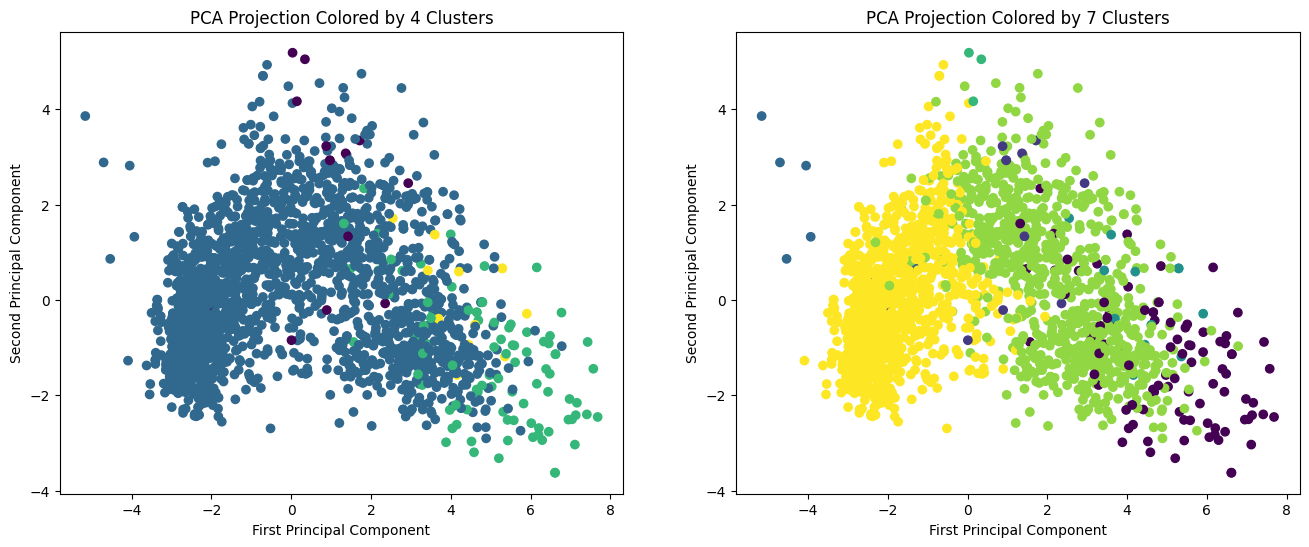

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(pca_result[:, 0], pca_result[:, 1], \
    c=customer['cluster_4'], cmap='viridis')
ax[0].set_xlabel('First Principal Component')
ax[0].set_ylabel('Second Principal Component')
ax[0].set_title('PCA Projection Colored by 4 Clusters')

ax[1].scatter(pca_result[:, 0], pca_result[:, 1], \
    c=customer['cluster_7'], cmap='viridis')
ax[1].set_xlabel('First Principal Component')
ax[1].set_ylabel('Second Principal Component')
ax[1].set_title('PCA Projection Colored by 7 Clusters')

### My Explanation
- The percentage of variance retained in the first 5 principle components are 24.722273%, 7.905317%, 7.24444% , 5.937241%, 4.772793%. 
- According to the PCA projection scatter plots
    - The one with 4 clusters has some clusters overlap with each other. And there's a cluster take up too much population
    - The one with 7 clusters is more clear and the size of each cluster is more reasonable

## Task 7 (20 points):

Conduct a k-means clustering of the data. Pre-process the data using a 5-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments. Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task. Which solution do you prefer and why?


In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
label_points = False
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).\
        fit_predict(pca_result)

    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_result, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.36830729741526186
For n_clusters = 3 The average silhouette_score is : 0.30197132440442076
For n_clusters = 4 The average silhouette_score is : 0.30755572631303857
For n_clusters = 5 The average silhouette_score is : 0.2539587167826409
For n_clusters = 6 The average silhouette_score is : 0.2460633008940856
For n_clusters = 7 The average silhouette_score is : 0.23451907023952084
For n_clusters = 8 The average silhouette_score is : 0.2341037085794567
For n_clusters = 9 The average silhouette_score is : 0.22425669601330195
For n_clusters = 10 The average silhouette_score is : 0.23089347830262155
For n_clusters = 11 The average silhouette_score is : 0.2265864638913388
For n_clusters = 12 The average silhouette_score is : 0.23494300889070066
For n_clusters = 13 The average silhouette_score is : 0.23978443398095584
For n_clusters = 14 The average silhouette_score is : 0.24263873412382944
For n_clusters = 15 The average silhouette_score i

For n_clusters = 4 The average silhouette_score is : 0.30755572631303857


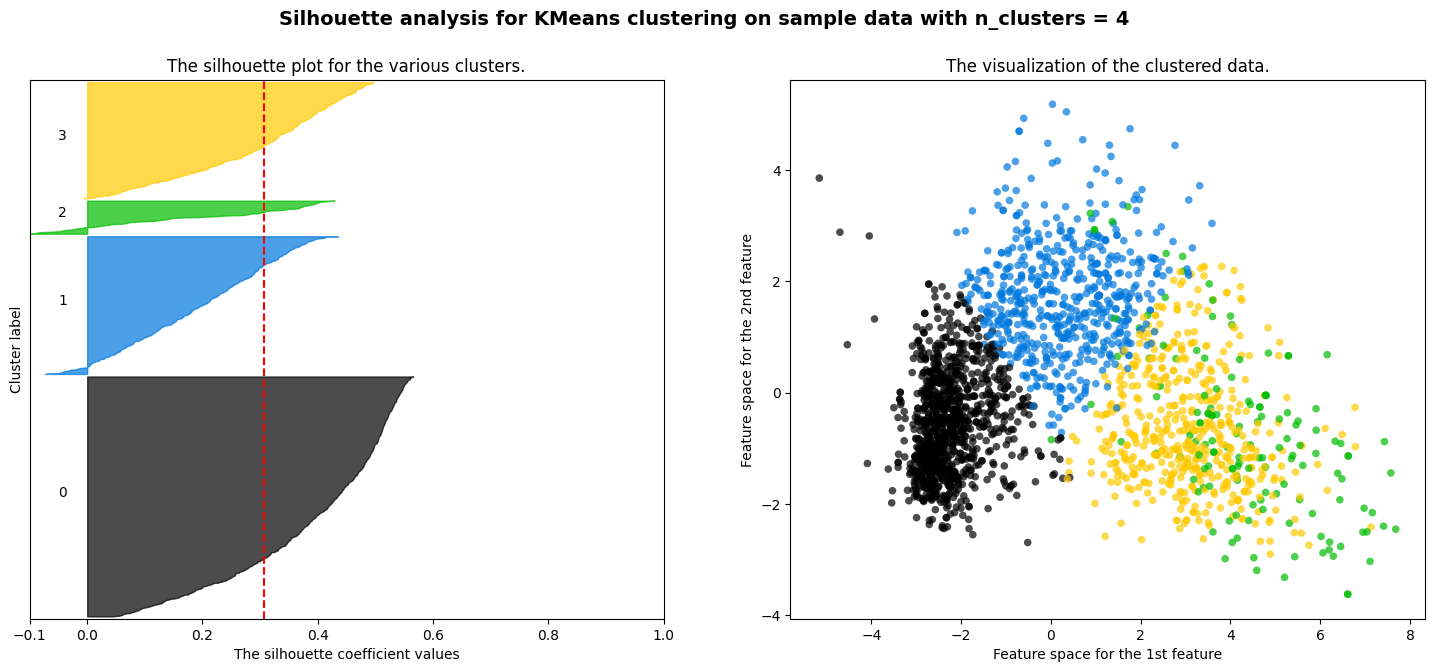

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [4]
label_points = False
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_result) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).\
        fit_predict(pca_result)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_result, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_result[:, 0], pca_result[:, 1], marker='o', s=30, lw=0, \
        alpha=0.7, c=colors, edgecolor='k')

    if label_points:
        for i,v in enumerate(pca_result):
            ax2.text(v[0],v[1],customer['ID'].iloc[i][0],alpha=0.4)


    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # #print(centers)
    # # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('silhouette%02d.pdf' % n_clusters)
plt.show()

In [94]:
kc_4 = KMeans(n_clusters=4, random_state=42).fit_predict(pca_result)
kc_4

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 3, ..., 1, 1, 0], dtype=int32)

In [95]:
customer_kc=pd.concat([customer_num, \
    pd.DataFrame(kc_4, columns=['kmeanscluster'])], axis=1)

In [96]:
customer_kc_table=customer_kc.groupby('kmeanscluster').mean()
customer_kc_table

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,In_Relationship,dt_customer_timestamp
kmeanscluster,,,,,,,,,,,,,,,,,,,,,
0,1971.895098,34891.771078,0.798039,0.432353,49.337255,39.616667,5.005882,23.016667,7.180392,5.112745,...,6.440196,0.074510,0.006863,0.000000,0.000000,0.001961,0.012745,0.088235,0.644118,1.376683e+09
1,1963.776451,56854.912116,0.257679,0.953925,48.232082,444.530717,20.052901,128.786689,27.215017,20.663823,...,5.873720,0.061433,0.122867,0.005119,0.027304,0.000000,0.006826,0.114334,0.668942,1.368463e+09
2,1971.049645,80210.684397,0.042553,0.177305,45.092199,910.177305,47.943262,433.638298,71.425532,56.035461,...,3.574468,0.177305,0.539007,0.794326,0.609929,0.198582,0.007092,0.737589,0.595745,1.371693e+09
3,1967.750507,74638.485801,0.048682,0.221095,50.829615,510.298174,71.602434,433.831643,102.868154,71.797160,...,2.827586,0.052738,0.024341,0.097363,0.085193,0.000000,0.006085,0.148073,0.630832,1.373797e+09


### My Explanation
- In my model, the optimal number of cluster is 4 because it has the highest average silouette score (cluster number = 2 is less resonable).
- The plot with 4 clusters is clear
- By grouping by the clusters and calculating the average value
    - People who spend more on meat also spend more on fish, fruits, gold and wines. They also have more income. They are middle age.
    - People who have less income surprisingly spend more on kid home. They also spend more time visiting webs
- Compared with the agglomerative clustering, the K-means clusters have more similar quantity and the shapes are more balanced 

## Task 8 (10 points):

Show the results of a t-SNE analysis of the dataset. Experiment with a variety of perplexity values and explain your final choice. As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments. Can you define customer segments by examining the characteristics of each cluster? How might you label the points in the t-SNE plot to show characteristics of each cluster?


In [97]:
from sklearn.manifold import TSNE
import plotly.express as px

In [98]:
def tsne_plot(perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_2d = tsne.fit_transform(customer_prepared)
    
    # ax = axes.flat[i]
    ax = px.scatter(x=X_2d[:, 0], y=X_2d[:, 1], \
        color=customer_kc['kmeanscluster'])
    ax.update_layout(title=f'Perplexity = {perplexity}',
                      xaxis_title='First Principal Component',
                      yaxis_title='Second Principal Component')
    return ax

In [99]:
tsne_plot(3)

In [100]:
tsne_plot(4)

In [101]:
tsne_plot(10)

In [102]:
tsne_plot(20)

In [103]:
tsne_plot(30)

In [104]:
tsne_plot(40)

In [105]:
tsne_plot(50)

In [106]:
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_2d = tsne.fit_transform(customer_prepared)

In [107]:
tsne_labelled = pd.concat([pd.DataFrame(X_2d,columns=['d1','d2']), \
        customer_num],axis=1)

In [108]:
tsne_labelled

,d1,d2,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,In_Relationship,dt_customer_timestamp
0,38.175865,19.748238,1957,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,0,1.333930e+09
1,-6.626948,36.054653,1954,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,0,1.407024e+09
2,20.945885,2.312920,1965,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,1,1.377043e+09
3,-48.680824,-13.339747,1984,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,1,1.412208e+09
4,-42.814537,-25.391848,1981,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,1,1.390090e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,11.134892,11.159555,1967,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,0,1,1.371082e+09
2236,-6.176604,-20.108120,1946,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,0,1,1.412554e+09
2237,45.123981,-23.448751,1981,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,0,0,1.390608e+09
2238,16.429899,-3.151470,1956,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,0,1,1.390522e+09


Recall the table

In [109]:
customer_kc_table=customer_kc.groupby('kmeanscluster').mean()
customer_kc_table

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,In_Relationship,dt_customer_timestamp
kmeanscluster,,,,,,,,,,,,,,,,,,,,,
0,1971.895098,34891.771078,0.798039,0.432353,49.337255,39.616667,5.005882,23.016667,7.180392,5.112745,...,6.440196,0.074510,0.006863,0.000000,0.000000,0.001961,0.012745,0.088235,0.644118,1.376683e+09
1,1963.776451,56854.912116,0.257679,0.953925,48.232082,444.530717,20.052901,128.786689,27.215017,20.663823,...,5.873720,0.061433,0.122867,0.005119,0.027304,0.000000,0.006826,0.114334,0.668942,1.368463e+09
2,1971.049645,80210.684397,0.042553,0.177305,45.092199,910.177305,47.943262,433.638298,71.425532,56.035461,...,3.574468,0.177305,0.539007,0.794326,0.609929,0.198582,0.007092,0.737589,0.595745,1.371693e+09
3,1967.750507,74638.485801,0.048682,0.221095,50.829615,510.298174,71.602434,433.831643,102.868154,71.797160,...,2.827586,0.052738,0.024341,0.097363,0.085193,0.000000,0.006085,0.148073,0.630832,1.373797e+09


### My Explanation
- Perplexity=40 performs the best since the groups don't overlap each other
- By labelling the points in the t-SNE by the color of clusters, it's clear the points in the same cluster is close to each other
- From left to right, the Income grows higher, which may indicate that the first component of PCA is positively related to Income. It also makes sense because the group sizes are become smaller as from left to right. I may label them from low-income to high-income
- Clusters are symmetrical to the second PCA components.

# NOTE

We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.
